In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pygtc
plt.style.use('bmh')
    
import sys 
sys.path.insert(0, '../src/')

import warnings; warnings.simplefilter('ignore')
from IPython.display import display, Math


In [3]:
def stack(samples, stack):    
    nsteps = samples.shape[0]
    ssteps = nsteps - stack
    s = samples[ssteps:nsteps,:,:].shape
    return samples[ssteps:nsteps,:,:].reshape(s[0] * s[1], s[2]) 

def best_fit_values(sample, labels):
    list_val = []
    for i in range(4):
        mcmc = np.percentile(sample[:, i], [16, 50, 84])
        q = np.diff(mcmc)
        txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
        txt = txt.format(mcmc[1], q[0], q[1], labels[i])
        #display(Math(txt))
        list_val.append([mcmc[1], q[0], q[1]])
    return np.array(list_val)

def error_bar(samples, xaxis, xlabel, labels):

    Nsamples = samples.shape[0]
    val_mat = np.zeros(shape=(Nsamples, 4, 3))

    for i in range(Nsamples):
        val_mat[i] = best_fit_values(samples[i], labels)

    fig, ax = plt.subplots(2, 2, sharex=True, figsize=(10,8))

    ax[0,0].errorbar(xaxis, val_mat[:, 0, 0], yerr=[val_mat[:, 0, 1], val_mat[:, 0, 2]], fmt="o", color="black")
    ax[0,0].axhline(1.8, ls=":")
    ax[0,0].set_ylabel(labels[0])
    ax[0,0].set_ylim(-1,5)

    ax[1,0].errorbar(xaxis, val_mat[:, 1, 0], yerr=[val_mat[:, 1, 1], val_mat[:, 1, 2]], fmt="o", color="black")
    ax[1,0].axhline(-0.2, ls=":")
    ax[1,0].set_xlabel(xlabel)
    ax[1,0].set_ylabel(labels[1])
    ax[1,0].set_ylim(-2,1)

    ax[0,1].errorbar(xaxis, val_mat[:, 2, 0], yerr=[val_mat[:, 2, 1], val_mat[:, 2, 2]], fmt="o", color="black")
    ax[0,1].axhline(0.4, ls=":")
    ax[0,1].set_ylabel(labels[2])
    ax[0,1].set_ylim(0,4)


    ax[1,1].errorbar(xaxis, val_mat[:, 3, 0], yerr=[val_mat[:, 3, 1], val_mat[:, 3, 2]], fmt="o", color="black")
    ax[1,1].axhline(10.1, ls=":")
    ax[1,1].set_xlabel(xlabel)
    ax[1,1].set_ylabel(labels[3])
    ax[1,1].set_ylim(9,11)
    plt.show() 

def violin_old(samples, labels, priors, truths):

    fig, ax = plt.subplots(2, 2, sharex=True,figsize=(10,10))

    ax[0,0].violinplot([samples[0][:,0], samples[1][:,0], samples[2][:,0], samples[3][:,0], samples[4][:,0]])
    ax[0,0].axhline(truths[0], ls=":", lw=2, color="black")
    ax[0,0].set_ylabel(labels[0])
    ax[0,0].set_ylim(priors[0][0], priors[0][1])

    ax[1,0].violinplot([samples[0][:,1], samples[1][:,1], samples[2][:,1], samples[3][:,1], samples[4][:,1]])
    ax[1,0].axhline(truths[1], ls=":", lw=2, color="black")
    ax[1,0].set_ylabel(labels[1])
    ax[1,0].set_ylim(priors[1][0], priors[1][1])

    ax[0,1].violinplot([samples[0][:,2], samples[1][:,2], samples[2][:,2], samples[3][:,2], samples[4][:,2]])
    ax[0,1].axhline(truths[2], ls=":", lw=2, color="black")
    ax[0,1].set_ylabel(labels[2])
    ax[0,1].set_ylim(priors[2][0], priors[2][1])

    ax[1,1].violinplot([samples[0][:,3], samples[1][:,3], samples[2][:,3], samples[3][:,3], samples[4][:,3]])
    ax[1,1].axhline(truths[3], ls=":", lw=2, color="black")
    ax[1,1].set_ylabel(labels[3])
    ax[1,1].set_ylim(priors[3][0], priors[3][1])
    plt.show() 


def violin(samples, plabels, priors, truths, labels):

    fig, ax = plt.subplots(2, 2, sharey=True,figsize=(10,10))

    a1_data = [samples[0][:,0], samples[1][:,0], samples[2][:,0], samples[3][:,0], samples[4][:,0]]
    a2_data = [samples[0][:,1], samples[1][:,1], samples[2][:,1], samples[3][:,1], samples[4][:,1]]
    a3_data = [samples[0][:,2], samples[1][:,2], samples[2][:,2], samples[3][:,2], samples[4][:,2]]
    a4_data = [samples[0][:,3], samples[1][:,3], samples[2][:,3], samples[3][:,3], samples[4][:,3]]

    ax[0,0].violinplot(a1_data, vert=False, showextrema=True, widths=0.5, showmedians=False)
    ax[0,0].axvline(truths[0], ls="--", lw=1, color="black")
    ax[0,0].set_xlabel(plabels[0])
    ax[0,0].set_xlim(priors[0][0], priors[0][1])
    ax[0,0].set_yticks([1, 2, 3, 4, 5], labels=labels)
    ax[0,0].invert_yaxis() 

    ax[0,1].violinplot(a2_data, vert=False, showextrema=True, widths=0.5, showmedians=False)
    ax[0,1].axvline(truths[1], ls="--", lw=1, color="black")
    ax[0,1].set_xlabel(plabels[1])
    ax[0,1].set_xlim(priors[1][0], priors[1][1])

    ax[1,0].violinplot(a3_data, vert=False, showextrema=True, widths=0.5, showmedians=False)
    ax[1,0].axvline(truths[2], ls="--", lw=1, color="black")
    ax[1,0].set_xlabel(plabels[2])
    ax[1,0].set_xlim(priors[2][0], priors[2][1])

    ax[1,1].violinplot(a4_data, vert=False, showextrema=True, widths=0.5, showmedians=False)
    ax[1,1].axvline(truths[3], ls="--", lw=1, color="black")
    ax[1,1].set_xlabel(plabels[3])

    plt.show() 

In [4]:
labels =  ["a1", "a2", "a3", "a4"]
truths = [1.95, -0.05, 0.25, 10]
priors = [[-2, 5],[-3, 2],[0, 5], [9,11]]

### N_hosts experiment

In [5]:
s10 = np.load("../../data/paper/N_hosts/10/samples.npz")["coords"]

s50n = np.load("../../data/paper/N_hosts/50/samples.npz")["coords"]

s100 = np.load("../../data/paper/N_hosts/100/samples.npz")["coords"]

s500 = np.load("../../data/paper/N_hosts/500/samples.npz")["coords"]

s1000 = np.load("../../data/paper/N_hosts/1000/samples.npz")["coords"]

In [6]:
stack10 = stack(s10, 300)
stack50n = stack(s50n, 300)
stack100 = stack(s100, 300)
stack500 = stack(s500, 300)
stack1000 = stack(s1000, 300)

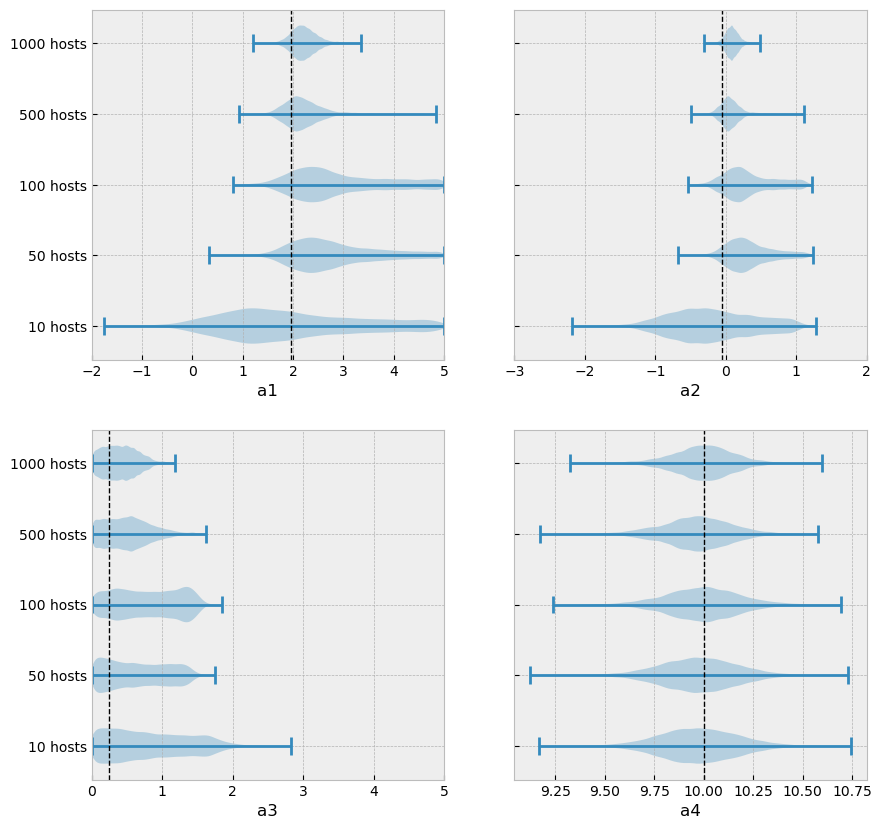

In [7]:
violin([stack1000, stack500, stack100, stack50n, stack10], plabels=labels, priors=priors, truths=truths, labels=['1000 hosts', '500 hosts', '100 hosts', '50 hosts', '10 hosts'])

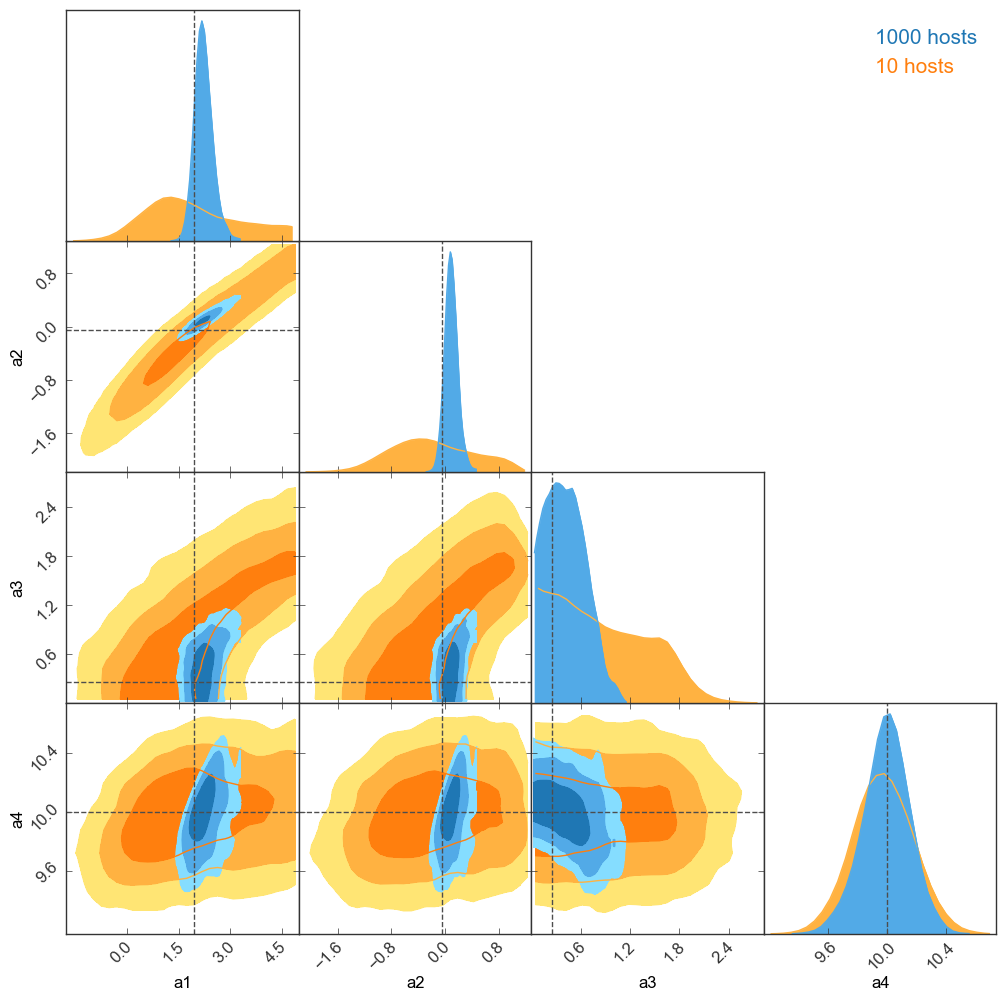

In [8]:
# Labels for the different chains
chainLabels = ["1000 hosts", "10 hosts"]


GTC = pygtc.plotGTC(chains=[stack1000, stack10], 
                    paramNames=labels,
                    chainLabels=chainLabels,
                    truths=truths,
                    nContourLevels=3,
                    figureSize=12,
                    smoothingKernel=1,
                    customTickFont={'family':'Arial', 'size':12},
                    customLegendFont={'family':'Arial', 'size':15},
                    customLabelFont={'family':'Arial', 'size':12})

### Min_mass experiment

In [9]:
s45 = np.load("../../data/paper/min_mass/4.5/samples.npz")["coords"]

s50 = np.load("../../data/paper/min_mass/5.0/samples.npz")["coords"]

s55 = np.load("../../data/paper/min_mass/5.5/samples.npz")["coords"]

s60 = np.load("../../data/paper/min_mass/6.0/samples.npz")["coords"]

s65 = np.load("../../data/paper/min_mass/6.5/samples.npz")["coords"]

In [10]:
stack45 = stack(s45, 300)
stack50 = stack(s50, 300)
stack55 = stack(s55, 300)
stack60 = stack(s60, 300)
stack65 = stack(s65, 300)

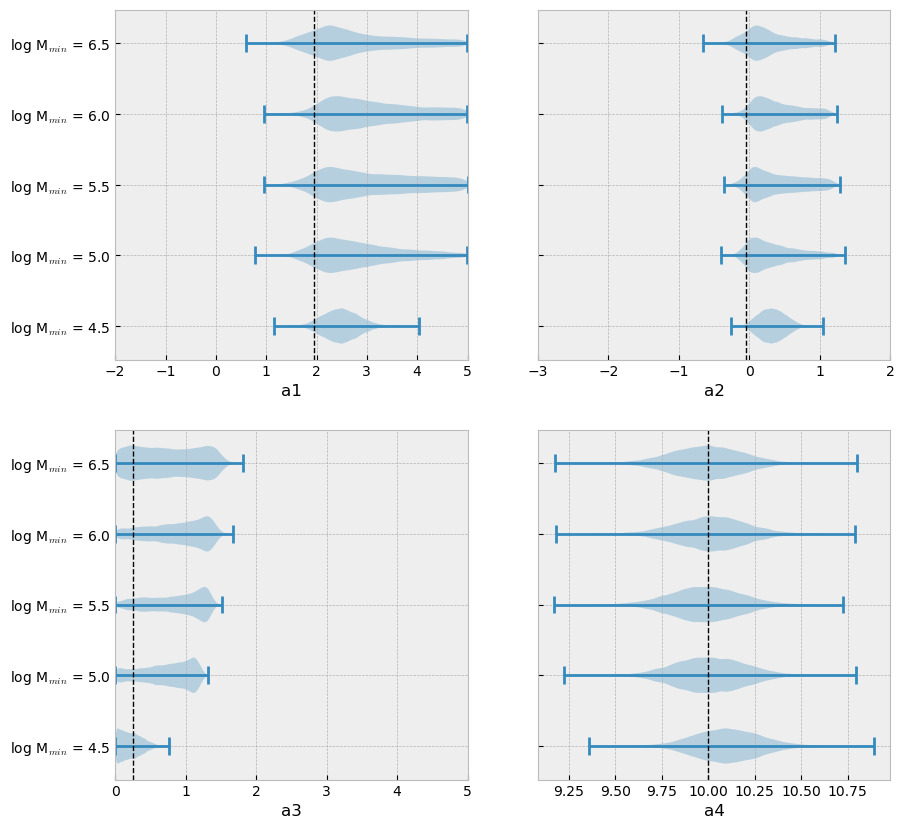

In [11]:
violin([stack65, stack60, stack55, stack50, stack45], plabels=labels, priors=priors, truths=truths, labels=['log M$_{min}$ = 6.5', 'log M$_{min}$ = 6.0', 'log M$_{min}$ = 5.5', 'log M$_{min}$ = 5.0', 'log M$_{min}$ = 4.5'])

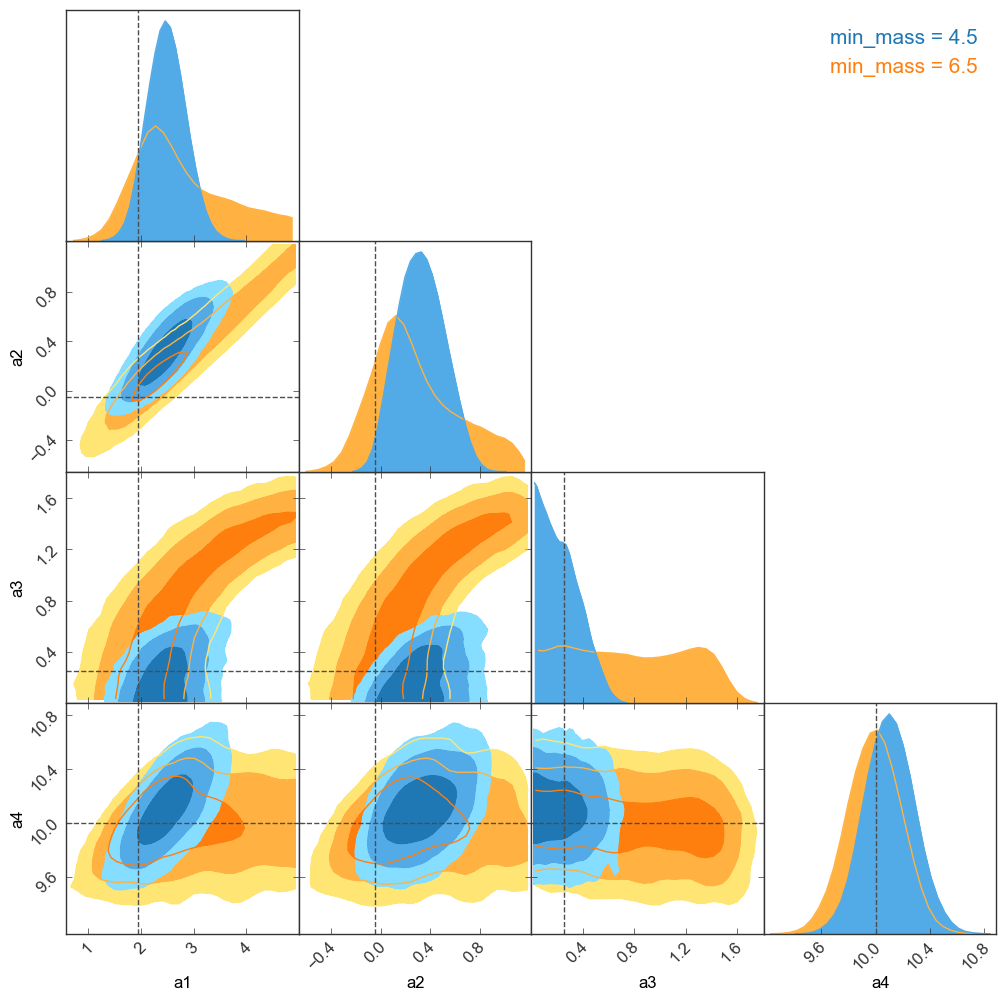

In [12]:
# Labels for the different chains
chainLabels = ["min_mass = 4.5", "min_mass = 6.5"]


GTC = pygtc.plotGTC(chains=[stack45, stack65], 
                    paramNames=labels,
                    chainLabels=chainLabels,
                    truths=truths,
                    nContourLevels=3,
                    figureSize=12,
                    smoothingKernel=1,
                    customTickFont={'family':'Arial', 'size':12},
                    customLegendFont={'family':'Arial', 'size':15},
                    customLabelFont={'family':'Arial', 'size':12})

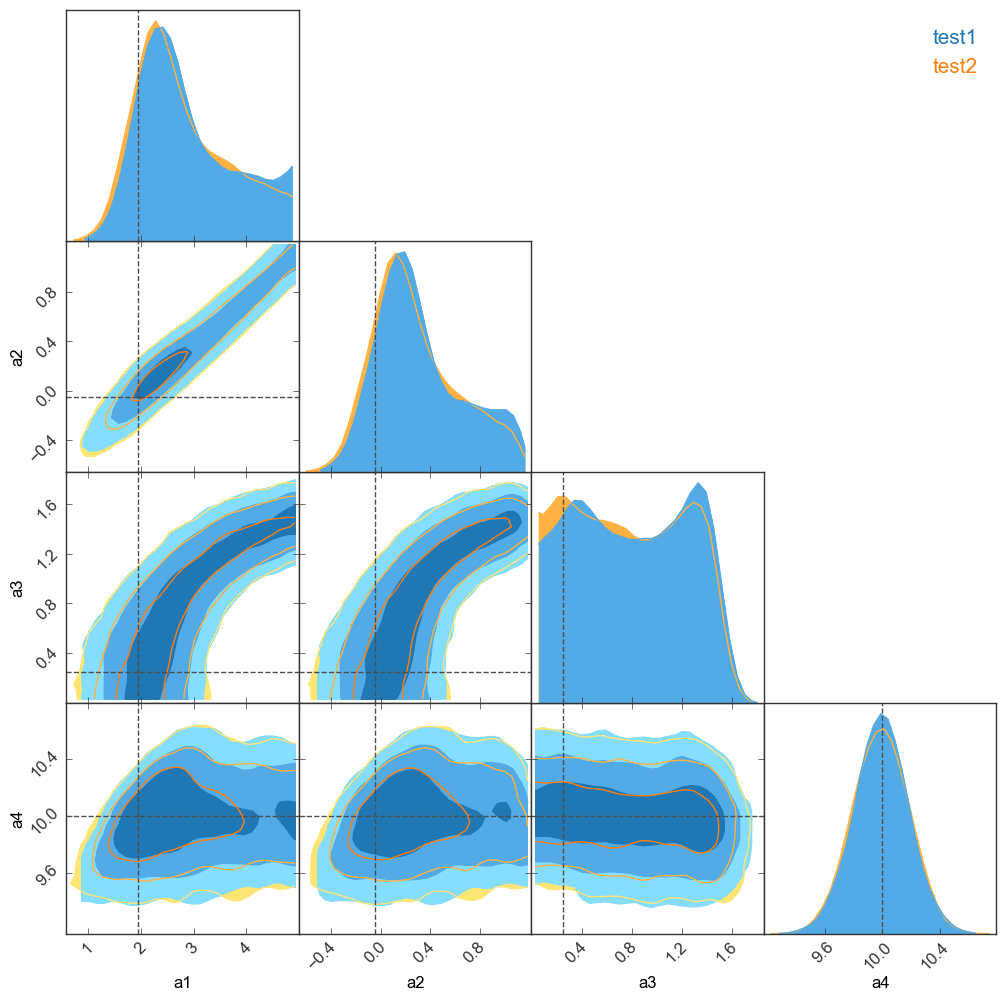

In [13]:
# JUST A SANITY CHECK
chainLabels = ["test1", "test2"]


GTC = pygtc.plotGTC(chains=[stack100, stack65], 
                    paramNames=labels,
                    chainLabels=chainLabels,
                    truths=truths,
                    nContourLevels=3,
                    figureSize=12,
                    smoothingKernel=1,
                    customTickFont={'family':'Arial', 'size':12},
                    customLegendFont={'family':'Arial', 'size':15},
                    customLabelFont={'family':'Arial', 'size':12})